# Objective

* Identify the Which Variable have more impact on Price of car 

* To build the Model which will help to Predict the Price of car based on Various parameter ( independent Variable ) 

In [101]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [102]:
df = pd.read_csv(r"CarSeats_updated_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   No           400 non-null    int64  
 2   Sales        400 non-null    float64
 3   CompPrice    400 non-null    int64  
 4   Income       400 non-null    int64  
 5   Advertising  400 non-null    int64  
 6   Population   400 non-null    int64  
 7   Price        400 non-null    float64
 8   ShelveLoc    400 non-null    object 
 9   Age          400 non-null    int64  
 10  Education    400 non-null    int64  
 11  Urban        400 non-null    object 
 12  US           400 non-null    object 
dtypes: float64(2), int64(8), object(3)
memory usage: 40.8+ KB


In [103]:
df.head()

,Unnamed: 0,No,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,1,9.50,138,73,11,276,184.6,Bad,42,17,Yes,Yes
1,1,2,11.22,111,48,16,260,143.2,Good,65,10,Yes,Yes
2,2,3,10.06,113,35,10,269,153.6,Medium,59,12,Yes,Yes
3,3,4,7.40,117,100,4,466,130.4,Medium,55,14,Yes,Yes
4,4,5,4.15,141,64,3,340,180.2,Bad,38,13,Yes,No


In [104]:
#Removing Non Numerical Values
df = df[['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education']]

In [105]:
# Clean DF
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,184.6,42,17
1,11.22,111,48,16,260,143.2,65,10
2,10.06,113,35,10,269,153.6,59,12
3,7.40,117,100,4,466,130.4,55,14
4,4.15,141,64,3,340,180.2,38,13


# EDA

#### Missing Value

In [106]:
df.isna().sum()  # no missing data

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
Age            0
Education      0
dtype: int64

# Outlier

<Axes: >

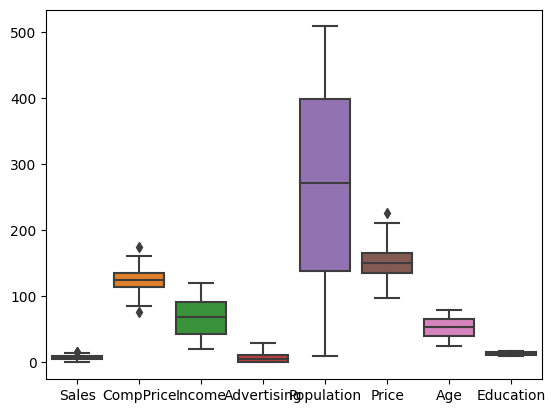

In [107]:
import seaborn as sns
sns.boxplot(data=df)

# Treatment of Outlier -- Winsorizing Technique

In [108]:
for i in df:                  # i = column name 
    if df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = df[i].quantile(0.25)  # for 1 column compute q1
        q3 = df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        df[i].clip(lower=ll,upper=ul,inplace=True)

<Axes: >

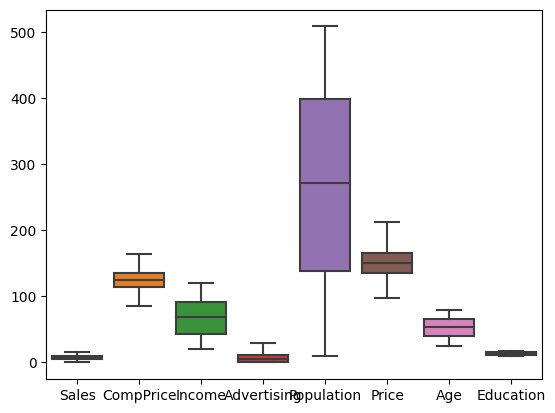

In [109]:
import seaborn as sns
sns.boxplot(data=df)

# Data Partition

In [110]:
X = df.drop('Price', axis= 1)
y = df[['Price']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7 ,random_state=134)

In [111]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,Price,Sales,CompPrice,Income,Advertising,Population,Age,Education
284,144.2,6.97,106,46,11,414,79,17
60,148.4,8.32,122,102,19,469,29,13
40,160.8,2.07,119,98,0,18,73,17
330,149.4,4.99,122,59,0,501,32,14
141,167.0,6.53,140,42,0,331,28,15


# Correlation

In [112]:
Correlation = train.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,Price,Sales,CompPrice,Income,Advertising,Population,Age,Education
Price,1.000000,0.031532,0.820048,-0.119871,-0.062116,-0.078467,-0.028098,-0.004235
Sales,0.031532,1.000000,0.079319,0.226794,0.286630,0.061877,-0.216080,-0.084322
CompPrice,0.820048,0.079319,1.000000,-0.106997,-0.043039,-0.129590,-0.069175,0.005637
Income,-0.119871,0.226794,-0.106997,1.000000,0.102473,0.027205,-0.031668,-0.041700
Advertising,-0.062116,0.286630,-0.043039,0.102473,1.000000,0.355152,-0.077940,-0.036795
Population,-0.078467,0.061877,-0.129590,0.027205,0.355152,1.000000,-0.023575,-0.092082
Age,-0.028098,-0.216080,-0.069175,-0.031668,-0.077940,-0.023575,1.000000,-0.007225
Education,-0.004235,-0.084322,0.005637,-0.041700,-0.036795,-0.092082,-0.007225,1.000000


###### Correlation 
* Resale & Horsepower have high impact on Price of Car
* Multi-Colinearity is Present

# VIF

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X1 = df.drop(['Price'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2,...8
                          index=X1.columns)  # column name
series_before

Sales           9.025735
CompPrice      32.393485
Income          6.815022
Advertising     2.324036
Population      4.306872
Age            10.634629
Education      23.049611
dtype: float64

* Multi- colinearity is Present in Dataset

# Model Builiding

#### Method 2 -- Variable selection Method
1. Forward Selection Method
2. Backward Selection Method

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector as sfs

lreg = LinearRegression()
Model = sfs(lreg, n_features_to_select = 5, direction='forward', scoring='r2')
Model.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5,
                          scoring='r2')

In [115]:
Model.feature_names_in_

array(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Age',
       'Education'], dtype=object)

In [116]:
Model.get_feature_names_out()

array(['CompPrice', 'Advertising', 'Population', 'Age', 'Education'],
      dtype=object)

#### Method 2 -- sklearn

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
X_train = X_train.loc[:,['CompPrice','Income','Population','Age','Education']]
X_train.head()

,CompPrice,Income,Population,Age,Education
284,106,46,414,79,17
60,122,102,469,29,13
40,119,98,18,73,17
330,122,59,501,32,14
141,140,42,331,28,15


In [119]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,CompPrice,Income,Population,Age,Education,Price
284,106,46,414,79,17,144.2
60,122,102,469,29,13,148.4
40,119,98,18,73,17,160.8
330,122,59,501,32,14,149.4
141,140,42,331,28,15,167.0


In [120]:
Model3 = LinearRegression()
Model3.fit(X_train,y_train)

LinearRegression()

In [121]:
np.round(Model3.intercept_,3)

array([-1.91])

In [122]:
np.round(Model3.coef_,4)

array([[ 1.2098, -0.0251,  0.0043,  0.0385, -0.0623]])

In [123]:
Model3.feature_names_in_

array(['CompPrice', 'Income', 'Population', 'Age', 'Education'],
      dtype=object)

#### Model

* y = 10.482 + 0.1498 * Horsepower + 0.1926 * Wheelbase - 0.2609 * Length + 1.9822 * Curb_weight + 0.5931 *Resale

# Prediction on Train

In [124]:
import numpy as np
train['fitted_value'] = np.round(Model3.predict(X_train),2)
train['Residual'] = np.round(train.Price - train.fitted_value,2)
train.head()

,CompPrice,Income,Population,Age,Education,Price,fitted_value,Residual
284,106,46,414,79,17,144.2,128.95,15.25
60,122,102,469,29,13,148.4,145.47,2.93
40,119,98,18,73,17,160.8,141.43,19.37
330,122,59,501,32,14,149.4,146.74,2.66
141,140,42,331,28,15,167.0,167.99,-0.99


In [125]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Price,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  68.0


# Assumption of Linear Regression 

<Axes: title={'center': 'Price vs CompPrice'}, xlabel='CompPrice', ylabel='Price'>

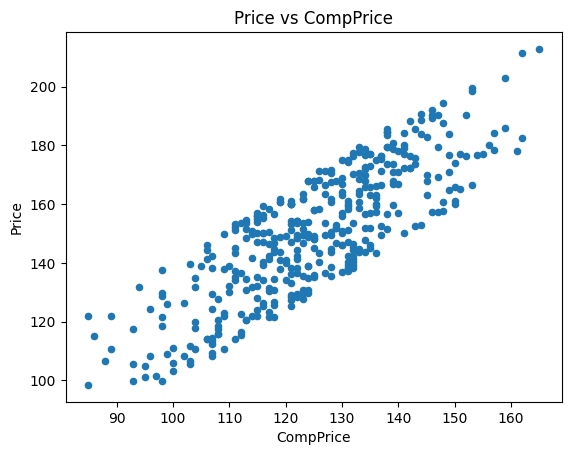

In [126]:
df.plot.scatter(x='CompPrice', y='Price', title='Price vs CompPrice')

# Homoscedasicity

<Axes: xlabel='fitted_value', ylabel='Residual'>

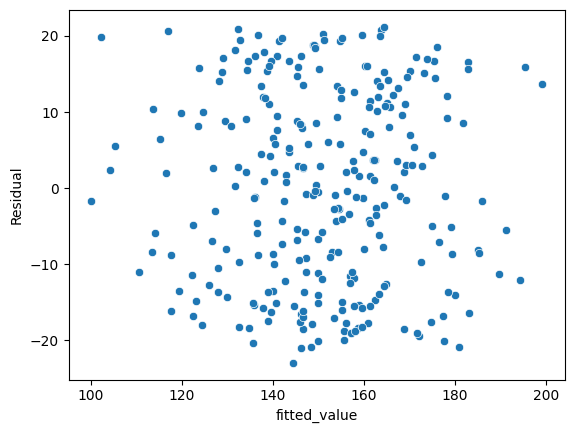

In [127]:
sns.scatterplot(x='fitted_value', y='Residual',data=train)

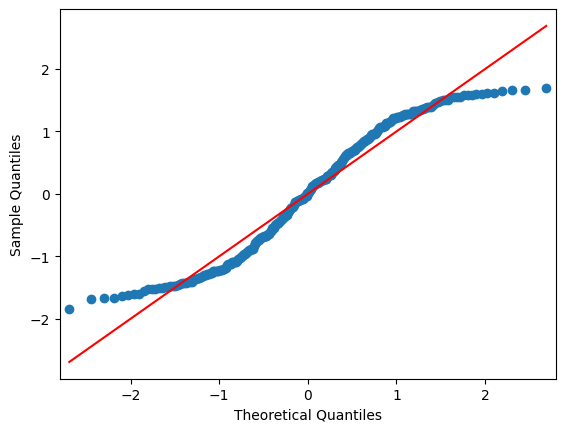

In [128]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(train['Residual'], fit=True, line='s') # s indicate standardized line
plt.show()

<Axes: ylabel='Frequency'>

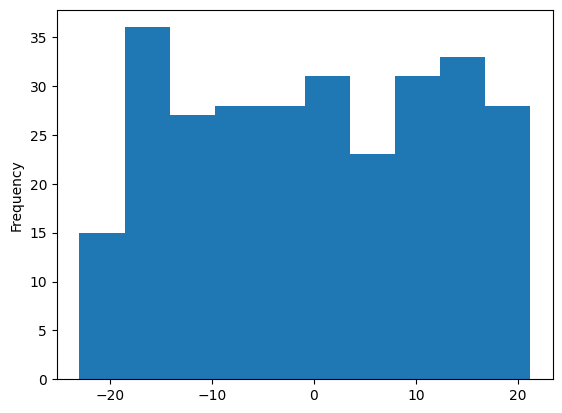

In [129]:
train['Residual'].plot.hist()

# Prediction on Test

In [130]:
X_test = X_test.loc[:,['CompPrice','Income','Population','Age','Education']]
X_test.head()

,CompPrice,Income,Population,Age,Education
368,109,22,348,74,14
229,98,104,404,27,18
208,86,54,497,33,12
153,150,36,488,25,17
296,127,44,160,63,18


In [131]:
test = pd.concat([X_test,y_test], axis=1)
test.head()

,CompPrice,Income,Population,Age,Education,Price
368,109,22,348,74,14,110.8
229,98,104,404,27,18,99.6
208,86,54,497,33,12,115.2
153,150,36,488,25,17,161.0
296,127,44,160,63,18,166.4


In [132]:
import numpy as np
test['Prediction'] = np.round(Model3.predict(X_test),2)
test['Error / Residual'] = np.round(test.Price - test.Prediction,2)
test.head()

,CompPrice,Income,Population,Age,Education,Price,Prediction,Error / Residual
368,109,22,348,74,14,110.8,132.89,-22.09
229,98,104,404,27,18,99.6,115.71,-16.11
208,86,54,497,33,12,115.2,103.46,11.74
153,150,36,488,25,17,161.0,180.68,-19.68
296,127,44,160,63,18,166.4,152.63,13.77


# Comparision

In [133]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Price,train.fitted_value)
print('R-Squared score for model Performance on Train : ', np.round(r2,2)*100)

R-Squared score for model Performance on Train :  68.0


In [134]:
r2 = r2_score(test.Price,test.Prediction)
print('R-Squared score for model Performance on Test : ', np.round(r2,2)*100)

R-Squared score for model Performance on Test :  69.0


# Loss Function -- RMSE

In [135]:
from sklearn.metrics import mean_squared_error 

model_mse = mean_squared_error(train['Price'],train['fitted_value'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Train Data : ",np.round(model_rmse,2)) #21

RMSE of Train Data :  12.48


In [136]:
model_mse = mean_squared_error(test['Price'],test['Prediction'])
model_rmse = np.sqrt(model_mse)

print("RMSE of Test Data : ",np.round(model_rmse,2)) #21

RMSE of Test Data :  12.28


# Finished